## Distant reading study week 3 (VT-23)

### Learning material 3b: named entity recognition (NER) with spacy.

Matti La Mela

In the first part we learn the basics of named entity recognition with spacy. In the second part, we use NER to analyse geopolitical place names in parliamentary debates in the UK house of commons.

### 1. Spacy NER introduction

In [1]:
# We'll take an example book from Gutenberg to work with spacy NER. From this URL we find Jane Austen's Pride and Prejudice.

import requests

request = requests.get("https://www.gutenberg.org/cache/epub/42671/pg42671.txt")
request.encoding = "utf-8"
novel = request.text

# If you are working offline, you can open the txt directly with:
# with open("./texts_week3/pg42671.txt", mode="r", encoding="utf-8") as file:
#     novel = file.read()

print("The length is: " + str(len(novel)))

print("\n")

print(novel[0:500])

# Ok, spacy could handle this, the length is under 1000000


The length is: 725046


﻿The Project Gutenberg eBook, Pride and Prejudice, by Jane Austen, Edited
by R. W. (Robert William) Chapman


This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org





Title: Pride and Prejudice


Author: Jane Austen

Editor: R. W. (Robert William) Chapman

Release Date: May 9, 2013 


In [2]:
# We do a simple cleaning with split(), and then join the list of tokens that split creates into a string again (whitespace between all the tokens).
# Perhaps the quotation marks could be removed too, but we leave that for now.

split = novel.split()
novel_cleaned = " ".join(split)

start = novel_cleaned.index("It is a truth")

text = novel_cleaned[start:]

print(text[0:2000])

It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters. "My dear Mr. Bennet," said his lady to him one day, "have you heard that Netherfield Park is let at last?" Mr. Bennet replied that he had not. "But it is," returned she; "for Mrs. Long has just been here, and she told me all about it." Mr. Bennet made no answer. "Do not you want to know who has taken it?" cried his wife impatiently. "_You_ want to tell me, and I have no objection to hearing it." This was invitation enough. "Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the plac

In [3]:
# We import SpaCy and load also the English language model.

import spacy

nlp = spacy.load("en_core_web_sm")



In [4]:
# Let's process our text with spacy nlp into a doc object. SpaCy could process the whole text,
# but we only take first 50000 characters by using index [0:50000], as processing the whole would simply take too much time.

doc_novel = nlp(text[0:50000])


In [5]:
# As part of the nlp pipeline, spacy recognizes and classifies named entities in the processed text.

# There are several ways to access the NE information. Spacy creates a tuple (which is similar to a list, but cannot be modified) about all the named entities
# in doc_book.ents. We can print it:

print (doc_novel.ents)

# You can try printing what type .ents is: it is a "tuple"

# print(type(doc_novel.ents))

(first, some one, Bennet, one day, Netherfield Park, Bennet, Long, Bennet, Long, Netherfield, England, Monday, four, Morris, Michaelmas, the end of next week, Bingley, four or, Bennet, one, one, Bingley, five, Bingley, one, William, Lady Lucas, Bingley, Lizzy, Lizzy, Jane, half, Lydia, Lizzy, Bennet, these twenty years, four thousand a year, twenty, twenty, Bennet, three and twenty years, CHAPTER II, Bennet, Bingley, the evening, second, Bingley, Lizzy, Bingley, Elizabeth, Long, Long, two, Bennet, Bennet, Kitty, Kitty, Kitty, Lizzy, Long, the day before, Bingley, Bennet, the end of a, Long, Bennet, Mary, Mary, Mary, Bingley, Bingley, this morning, Bennet, first, Bennet, this morning, Kitty, Bennet, every day, Lydia, Bingley, Lydia, Bennet, Bennet, five, Bingley, second, Lady Lucas, William, Bingley, Netherfield, Bennet, a few days, Bingley, Bennet, about ten minutes, Bennet, Bingley, the following day, &c. Mrs., Bennet, Hertfordshire, one, Netherfield, Lady Lucas, London, Bingley, twel

In [6]:
# We can access the .ents with index, eg. print (doc_book.ents[0]), or iterate it with a for-loop.
# Let's print the first ten named entities and see what spacy has recognised:

for entity in doc_novel.ents[0:10]:
    print("The named entity is '" + entity.text + "' and the class is: " + entity.label_)

The named entity is 'first' and the class is: ORDINAL
The named entity is 'some one' and the class is: CARDINAL
The named entity is 'Bennet' and the class is: PERSON
The named entity is 'one day' and the class is: DATE
The named entity is 'Netherfield Park' and the class is: FAC
The named entity is 'Bennet' and the class is: PERSON
The named entity is 'Long' and the class is: PERSON
The named entity is 'Bennet' and the class is: PERSON
The named entity is 'Long' and the class is: PERSON
The named entity is 'Netherfield' and the class is: GPE


In [7]:
# If we don't understand or remember what the classes are, we can ask spacy.
# We have also the classes explained in Lecture3 slides (or in spacy documentation online).

print(spacy.explain("FAC"))

Buildings, airports, highways, bridges, etc.


In [8]:
# Here we create a list with all the person names. The attribute .label has the NE class (GPE, PERSON etc.).
# The attribute .text stores the actual entity as a string variable.

# We iterate through all the recognised named entities, see if the entity is a "PERSON", and if yes, store it into our list "list_persons"

list_persons = []

for entity in doc_novel.ents:
    if entity.label_ == "PERSON":          # We use the class "PERSON" here.
        list_persons.append(entity.text)

print("The entities tagged with label PERSON are: " + spacy.explain("PERSON"))

print("")

print(list_persons)

The entities tagged with label PERSON are: People, including fictional

['Bennet', 'Bennet', 'Long', 'Bennet', 'Long', 'Morris', 'Michaelmas', 'Bennet', 'Bingley', 'Bingley', 'William', 'Lady Lucas', 'Bingley', 'Lizzy', 'Lizzy', 'Jane', 'Lizzy', 'Bennet', 'Bennet', 'Bennet', 'Bingley', 'Bingley', 'Lizzy', 'Bingley', 'Elizabeth', 'Long', 'Long', 'Bennet', 'Bennet', 'Lizzy', 'Long', 'Bingley', 'Bennet', 'Long', 'Bennet', 'Mary', 'Mary', 'Mary', 'Bingley', 'Bingley', 'Bennet', 'Bennet', 'Bennet', 'Bingley', 'Bennet', 'Bennet', 'Bingley', 'Lady Lucas', 'William', 'Bingley', 'Bennet', 'Bingley', 'Bennet', 'Bennet', 'Bingley', 'Bennet', 'Lady Lucas', 'Bingley', 'Bingley', 'Bingley', 'Hurst', 'Darcy', 'Bingley', 'Bingley', 'Darcy', 'Hurst', 'Miss Bingley', 'Bennet', 'Elizabeth Bennet', 'Darcy', 'Bingley', 'Darcy', 'Darcy', 'Bennet', 'Elizabeth', 'Bingley', 'Darcy', 'Elizabeth', 'Bennet', 'Netherfield', 'Bingley', 'Jane', 'Elizabeth', 'Jane', 'Mary', 'Bingley', 'Catherine', 'Longbourn', 'Benne

In [9]:
# We could take our list to pandas for counting, but we use again Counter for counting (See Material_3a). It is handy for simple counting.

from collections import Counter

# Here we count the frequencies of the strings in the list:

print ("All frequencies counted: " + str(Counter(list_persons)))
print ("")

# Here we print only the 10 most common strings in the list:

#print ("Top 10 person named entites and their frequencies: " + str(Counter(list_persons).most_common(10)))


All frequencies counted: Counter({'Bennet': 45, 'Bingley': 37, 'Darcy': 28, 'Jane': 25, 'Elizabeth': 23, 'Lizzy': 11, 'Long': 10, 'Mary': 8, 'William': 7, 'Hurst': 6, 'Lady Lucas': 5, 'Miss Lucas': 5, 'Miss Bingley': 4, 'Meryton': 4, 'Lucas': 4, 'Lydia': 4, 'Elizabeth Bennet': 3, 'Catherine': 3, 'Longbourn': 3, 'Robinson': 3, 'Forster': 3, 'Miss Eliza': 3, 'Philips': 3, 'Netherfield': 2, 'William Lucas': 2, 'Morris': 1, 'Michaelmas': 1, 'Miss King': 1, 'Maria Lucas': 1, 'Bennets': 1, 'Lucas Lodge': 1, 'Bennet.--They': 1, 'he?--Poor Eliza!--to': 1, 'Jane.--"I': 1, "Ma'am": 1, 'CHAPTER VI': 1, 'Vingt': 1, 'Charlotte': 1, "William Lucas's": 1, 'Darcy!--There': 1, 'Captain Carter': 1, 'Carter': 1, 'Watson': 1, 'Friend': 1, 'Louisa': 1, 'Jones': 1})



In [ ]:
# Finally, spacy has a built-in visualizer for named entities, which can be helpful when exploring the research material. The visualizer is called displacy.

# We process 1000 first tokens to give an example

from spacy import displacy

displacy.render(doc_novel[0:1000], style="ent")

--

### 2. NER with House of Commons debates (and by using spacy with large files)

Here we conduct a small NER analysis by using parliamentary debates from the UK House of Commons. The debates have been extracted from the Harvard Dataverse ParlSpeech dataset: Rauh, Christian; De Wilde, Pieter; Schwalbach, Jan, 2017, "The ParlSpeech data set: Annotated full-text vectors of 3.9 million plenary speeches in the key legislative chambers of seven European states", https://doi.org/10.7910/DVN/E4RSP9, Harvard Dataverse, V1.

The data includes metadata about the speeches, eg. the speaker name, party, date, speech number. The file (and files for home assignments) include only the speeches, and the speaker names have been left out. Moreover, all speeches from one year are included in one single file (e.g. commons_speeches_1990.txt for year 1990).

The speeches are separated with \n\n. The files are large, between 40 and 80 MB, so way too big for spacy to handle directly.

In [12]:
# We will open the file "commons_speeches_1990.txt", which contains the debates at the House of Commons from 1990

with open("./commons_speeches_1990.txt", mode="r", encoding="utf-8") as file:
    speech_all = file.read()

print(len(speech_all))



69625114


In [13]:
# The file is too large for spacy (as default it copes with max 1000000 character text files).

# Let's split this into a list between the paragraphs (in the file, there is \n\n after each speech.)
# Another option would be to process this in chunks of 500000 chars with a for-loop, for instance.
# Or, one could create smaller files already when extracting the data (eg. speeches per day).

speeches = speech_all.split("\n\n")

print("Number of speeches: ", len(speeches))

print("The first speech is: '" + speeches[0] + "'")

# ok, spacy can handle this length!



Number of speeches:  62911
The first speech is: 'I shall be very brief, Mr. Speaker. You will remember that in 1970 the late Mr. Marcus Lipton referred to the growing ineffectiveness of this Sessional Order. Twenty years later, traffic has hardly diminished in and around Parliament square. Parked coaches especially cause traffic jams at every entrance to the square. Could you, Mr. Speaker, please use your good offices to see that these tower blocks on wheels are banned from parking within one mile of this place?'


In [14]:
# We want to find all GPE named entities (geopolitical places) mentioned in the debates.

# In the for-loop, we process every speech with spacy and extract the named entity information.

# Every element in the list is processed through spacy NLP pipeline, which is a rather slow process.
# We will iterate only 200 first speeches to save some time (again, when our pipeline is tested and ready, we could process all speeches).

list_GPE = []

for speech in speeches[0:200]: # This is our first for loop, where we iterate through our list of "speeches". The speeches are assigned to "speech" one by one.
    doc = nlp(speech, disable = ["lemmatizer", "tagger"])  # we disable some parts of the pipeline that we do not need in this exercise

    for entity in doc.ents: # We iterate here all the named entities SpaCy has recognized
        if entity.label_ == "GPE": # If the named entity is "GPE",
            list_GPE.append(entity.text) # we append it to our list_GPE
    
    

In [15]:
# We can use Counter to see what are the most common places:

from collections import Counter

print("The 10 most common GPE places in the first 200 speeches in 1990: " + str(Counter(list_GPE).most_common(10)))

The 10 most common GPE places in the first 200 speeches in 1990: [('Britain', 105), ('Kuwait', 59), ('Iraq', 40), ('Scotland', 27), ('Richmond', 27), ('the United States', 26), ('Germany', 21), ('Barnes', 17), ('the Gracious Speech', 16), ('the United Kingdom', 15)]


In [16]:
# Let's see in what kind of sentences the word Kuwait appears (The Gulf War took place between August 1990 and January 1991)

# We want to go through the entities at the token level so we are able to save the sentence where the entity appears.
# We can do it through another for-loop where we save the sentence (spacy feature) where the token appears, .sent.text, into a list.

# Again, we process only 200 speeches.

Kuwait_sentences = []

for speech in speeches[0:200]: # we read the speeches from list "speeches" to the variable "speech"
    doc = nlp(speech, disable = ["lemmatizer", "tagger"])  # we process the "speech" at every iteration with spacy

    for token in doc: # we iterate through the tokens in the speech, now a spacy object
        if token.text == "Kuwait": # if the token.text (the string) is "Kuwait",
            Kuwait_sentences.append(token.sent.text) # we store the sentence where it appears to our list "Kuwait_sentences"

# Let's print an example sentence
            
print(Kuwait_sentences[0])

My Government will work with the utmost determination, together with our Allies and the whole international community, for the unconditional implementation of the resolutions of the United Nations Security Council which require the withdrawal of Iraq from Kuwait, and the restoration of the independence and legitimate government of Kuwait.


In [17]:
# OPTIONAL

# Perhaps it's nice to visualize these sentences as a word cloud so we grasp what the sentences are about.
# However, let's first remove all stopwords and alphanumerical from the sentences.

string = " ".join(Kuwait_sentences)
doc = nlp(string)

list_words = []

for token in doc:
    if (token.is_stop == False) and (token.is_alpha):
        list_words.append(token.lemma_)
        
# print(list_words[0:30])

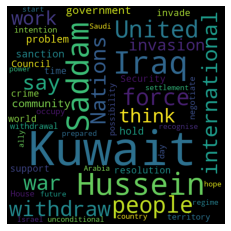

In [20]:
# OPTIONAL

# Ok, time to read the list to pandas Series and visualize it. The image is saved to our folder, where we can have a more detailed look at it.

import pandas as pd

count = pd.Series(list_words).value_counts()

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="black",width=500,height=500, max_words=50).generate_from_frequencies(count)
plt.imshow(wc)
plt.axis("off")
plt.savefig("./wordcloud_kuwait.png", dpi = 200)
plt.show()

# We have some first results about what geopolitical locations were important topics in the UK parliament in the 1990s. Moreover, we took a closer look
# at the case of Kuwait. From this, we could expand our analysis to other countries or more speeches from the same (or other years). There could be also other
# political metadata added to the analysis, which was removed from the files so that we can discuss only on the general discourse.